# Optimisez La Gestion Des Données D'une Boutique Avec Python

#  SOMMAIRE
## 1-Importation des Librairies
## 2-Lectures des Données
## 3-Exploration des Dataframes
### 3-1 Erp
### 3-2 Liaison
### 3-3 Web
## 4-Netoyage des données
### 4-1 Fichier erp
### 4-2 Fichier web
### 4-3 Fichier Liaison
## 5-Rapprochement entre erp et web
## 6-Calcul du Chiffre d'Affaire
### 6-1 Chiffre d'Affaire par produit
### 6-2 Chiffre d'Affaire total
## 7-Analyse des outliers
### 7-1 La méthode graphique
### 7-2 La méthode z-score
### 7-3 La méthode écart interquartile
## 8-Analyse Des Ventes
### 8-1 Conclusion

# 1-Importation des Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 2-Lectures des Données

In [2]:
erp = pd.read_excel('erp.xlsx')

In [3]:
liaison = pd.read_excel('liaison.xlsx')

In [4]:
web = pd.read_excel('web.xlsx')

# 3-Exploration des Dataframes

## 3-1 Erp

In [5]:
erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [6]:
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [7]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


## 3-2 Liaison

In [8]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [9]:
liaison.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


## 3-3 Web

In [10]:
web.head()            # erreur lexicale dans la variables sku et post_name

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

# 4-Netoyage des données

## 4-1 Fichier erp

##### On cherche les doublons dans le fichier erp dans la variable product_id

In [12]:
erp.duplicated('product_id').sum()     # pas de doublon tous les product_id sont uniques

0

##### on crée une nouvelle colonne en fonction des colonnes stock_quantity et stock_status pour vérifier si 
##### stock_status = 0 on a stock_status = outofstock et 
##### stock_status>0 on a stock_status = instock
##### on crée une nouvelle colonnes selon le résultat des conditions sinon on met error

In [13]:
conditions = [                                                                    #on crée les conditions 
                                                                                                        #stock_quantity = 0  alors stock_status= outofstock
    erp['stock_quantity'].eq(0) & erp['stock_status'].eq('outofstock'),                                  #stock_quantity >0  alors stock_status= instock
    erp['stock_quantity'].gt(0) & erp['stock_status'].eq('instock'),
]

choices = ['OK1','OK2']                                                          #le résultat si les conditions sont respectées

erp['test_stock'] = np.select(conditions, choices, default='error')           #on crée une nouvelle colonnes selon le résultat des conditions sinon on met error
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,test_stock
0,3847,1,24.2,0,outofstock,OK1
1,3849,1,34.3,0,outofstock,OK1
2,3850,1,20.8,0,outofstock,OK1
3,4032,1,14.1,0,outofstock,OK1
4,4039,1,46.0,0,outofstock,OK1


##### on cherche s'il ya des error dans la variable test_stock

In [14]:
erp['test_stock'].unique()

array(['OK1', 'OK2', 'error'], dtype=object)

##### on filtre sur error

In [15]:
erp[erp['test_stock'] == 'error']                            

,product_id,onsale_web,price,stock_quantity,stock_status,test_stock
443,4954,1,25.0,0,instock,error


##### on remplace la cellule [443, 'stock_status'] par outofstock

In [16]:
erp.loc[443, 'stock_status'] = 'outofstock'                       

##### on refait le test pour vérifier qu'il n'y a plus error

In [17]:
conditions = [                                                              
                                                                                                        
    erp['stock_quantity'].eq(0) & erp['stock_status'].eq('outofstock'),                                  
    erp['stock_quantity'].gt(0) & erp['stock_status'].eq('instock'),
]

choices = ['OK1','OK2']                                                          
erp['test_stock'] = np.select(conditions, choices, default='error')           
erp[erp['test_stock'] == 'error']                                       #On filtre sur error pour vérifier le test

,product_id,onsale_web,price,stock_quantity,stock_status,test_stock


## 4-2 Fichier web

##### on va remplacer la chaine de caractère 'bon-cadeau-25-euros' par un null dans la colonne sku

In [18]:
web['sku'] = web['sku'].replace('bon-cadeau-25-euros', np.nan)

##### on va remplacer la chaine de caractère bon-cadeau-de-25-euros par un null dans lacolonne post_name

In [19]:

web['post_name'] = web['post_name'].replace('bon-cadeau-de-25-euros', np.nan)

##### cherchons les colonnes vides

In [20]:
web.isnull().sum()

sku                        87
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  85
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

##### on supprime les colonnes vides

In [21]:

web.drop(columns = ['tax_class', 'post_content', 'post_password', 'post_content_filtered'], inplace = True)

##### on compte le nombre de doublon

In [22]:

web['sku'].duplicated().sum()

799

##### on filtre sur certains sku sur quelques colonnes pour vérifier si un produit est affiché deux fois avec un post_type produit et attachement* 

In [23]:

web[web['sku']==15298].loc[:,['sku', 'post_type', 'post_mime_type']]

,sku,post_type,post_mime_type
1,15298,product,NaN
799,15298,attachment,image/jpeg


In [24]:
web[web['sku']==15296].loc[:,['sku', 'post_type', 'post_mime_type']]

,sku,post_type,post_mime_type
2,15296,product,NaN
800,15296,attachment,image/jpeg


##### On récupère les index pour lesquels la colonne post_type a une valeur attachment
##### ensuite on supprimez ces index de lignes du dataFrame
##### enfin on vérifie les entrée unique dans la variable post_type

In [25]:
indexNames = web[ web['post_type'] == 'attachment' ].index         
web.drop(indexNames , inplace=True)
web['post_type'].unique() 

array(['product', nan], dtype=object)

##### on met dans une variable toutes les valeur null de sku

In [26]:
web_nan_values = web[web['sku'].isna()]

##### on filtre sur les lignes dont total_sales est superieur a zero

In [27]:
web_nan_values_filtered=web_nan_values[web_nan_values['total_sales'].gt(0)]

##### on filtre sur l'indexe dont les ventes sont supérieurs à zero

In [28]:
x= web_nan_values['guid']
print(x[0])

https://www.bottle-neck.fr/?post_type=product&#038;p=4954


#### on recupere le sku du produit dans une variable



In [70]:
# substring à rechercher 
sub ='p='               
 
# dans une nouvelle colonne on met la position de la variable sub 

web_nan_values_filtered["position_sub"]= web_nan_values_filtered["guid"].str.index(sub) + 2 

web_nan_values_filtered["position_sub"].astype(int)        #changer le type en int

for i in range(0, len(web_nan_values_filtered)):
    web_nan_values_filtered['sku'].iloc[i] = web_nan_values_filtered.iloc[i].guid[web_nan_values_filtered['position_sub'].iloc[i]:]
  
     #on coupe la colone guide à partir de position_sub jusqu'à la fin ensuite on affecte le resultat de chaque ligne au Sku 

web_nan_values_filtered.drop(columns = "position_sub" )


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,TMP
0,4954,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,NaN,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,53


##### on fait une concat entre web_nan_values_filtered et web

In [30]:
web=pd.concat([web_nan_values_filtered, web])

##### on supprime les null de sku

In [31]:
web = web.dropna(subset=['sku'])

##### on verifie s'il ya des doublons 

In [32]:
web.duplicated('sku').sum()

0

## 4-3 Fichier Liaison

In [33]:
liaison.tail()

,product_id,id_web
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1
824,7338,16230


##### on recherche les doublons de product_id

In [34]:
liaison.duplicated('product_id').sum()                    

0

##### on recherche les doublons de id_web

In [35]:
liaison.duplicated('id_web').sum()                      

90

##### on affecte dans une nouvelle variable les nulls de id_web

In [36]:
liaison_nan_values = liaison[liaison['id_web'].isna()]

##### on supprime les nulls dans le dataframe liaison

In [37]:
liaison = liaison.dropna(subset=['id_web'])                 

# 5-Rapprochement entre erp et web

##### faisons dabord un merge entre erp et liaison

In [38]:
erp_liaison = erp.merge(liaison, on = 'product_id')

##### modifions le nom de la colonne sku par id_web

In [39]:
web.rename(columns={'sku': 'id_web'}, inplace= True)

##### joignons la table erp_liaison par la table web

In [40]:
erp_web = erp_liaison.merge(web, on = 'id_web')

In [41]:
erp_web.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status,test_stock,id_web,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,TMP
0,3847,1,24.2,0,outofstock,OK1,15298,0,0,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
1,3849,1,34.3,0,outofstock,OK1,15296,0,0,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN


# 6-Calcul du Chiffre d'Affaire

## 6-1 Chiffre d'Affaire par produit

##### calculons le chiffre d'affaire par produit 

In [42]:
erp_web['CA_par_produit'] = erp_web['price']* erp_web['total_sales']
erp_web.head(1)

,product_id,onsale_web,price,stock_quantity,stock_status,test_stock,id_web,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,TMP,CA_par_produit
0,3847,1,24.2,0,outofstock,OK1,15298,0,0,0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,145.2


## 6-2 Chiffre d'Affaire total

In [43]:
ca_Total = erp_web['CA_par_produit'].sum()

In [44]:
print("le Chiffre d'Affaire total est de", ca_Total)

le Chiffre d'Affaire total est de 70318.6


# 7-Analyse des outliers

## 7-1 La méthode graphique

<AxesSubplot:>

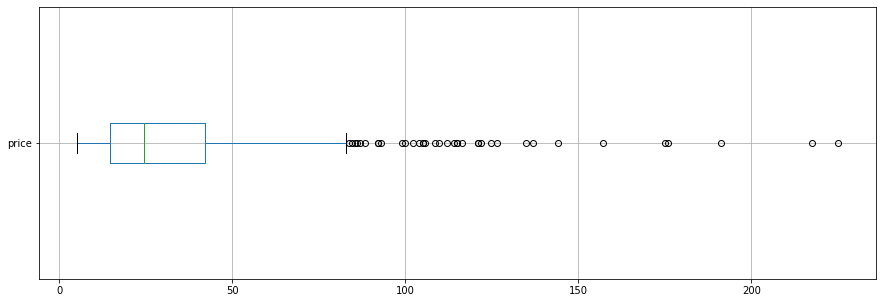

In [45]:
erp.boxplot(column="price", vert=False, figsize = (15,5))


## 7-2 La méthode z-score

##### On determine les valeurs aberrantes en utilisant la méthode Z-score
###### Le z score est le nombre d'ecart-type par rapport à la moyenne d'un point d'information
##### z = (x – μ)/σ
##### µ= moyenne
##### σ= ecart-type
##### x= le prix

In [46]:
outliers=[]                     #liste vide
def detect_outliers(erp):        #foction pour detecter les outliers
    threshold= 3                #seuil
    mean = np.mean(erp.price)     #moyenne
    std =np.std(erp.price)        #ecart-type
    
    for i in erp['price']:        #parcourir toutes les lignes de la variable price  
        z_score=(i-mean)/std      #mesurer le z-score pour toute les valeurs de la variable price
        if np.abs(z_score)> threshold:   #comparer si la valeur absolue du z-score est supérieure au seuil
            outliers.append(i)            #si le z-score est supérieur on l'ajoute à la liste outliers
    return outliers

In [47]:
detect_outliers(erp)

[225.0,
 126.5,
 176.0,
 157.0,
 144.0,
 137.0,
 217.5,
 124.8,
 175.0,
 191.3,
 122.0,
 114.0,
 135.0,
 116.4,
 115.0,
 121.0,
 115.0,
 121.0]

In [48]:
print('Le nombre de prix aberrants est de', len(outliers))

Le nombre de prix aberrants est de 18


## 7-3 La méthode écart interquartile


###### L'ecart interquartile est une mesure de dispersion qui s'obstient en faisant la différence entre le 3eme quartile et le 1er quartile
###### quartile est chacune des 3 valeurs qui divise les données triées en 4 parts égales

In [49]:
def find_all_outliers(erp):
    Q1 = np.quantile(erp['price'], 0.25)       #Q1 = 1er quartile
    Q3 =np.quantile(erp['price'], 0.75)         #Q3 = 3em quartile
    EIQ = Q3 - Q1                               #EIQ = Ecart InertQuartile
    LI = Q1 - (EIQ*1.5)                         #LI = Limite Inférieur
    LS = Q3 - (EIQ*1.5)                         #LS = Limite Supérieure
    
    outliers = erp[erp['price']>LS, erp['price']<LI]    #tous les prix superieur à la LS ou inférieur à la LI sont des outliers
    return outliers
   

In [50]:
 outliers

[225.0,
 126.5,
 176.0,
 157.0,
 144.0,
 137.0,
 217.5,
 124.8,
 175.0,
 191.3,
 122.0,
 114.0,
 135.0,
 116.4,
 115.0,
 121.0,
 115.0,
 121.0]

In [51]:
print(len(outliers))


18


##### 

# 8-Analyse Des Ventes

##### on crée une nouveau dataframe en ordonnant la colonne CA_par_produit de facon décroissante ensuite dans ce dataframe on crée:
##### une nouvelle colonne somme_cumulée_CA apartir CA_par_produit
##### une nouvelle colonne  rang en fonction du CA_par_produit le plus élevé
##### une nouvelle colonne ca_total

In [71]:
erp_web_new = erp_web[['product_id', 'price', 'total_sales', 'CA_par_produit', 'post_name']].sort_values(by='CA_par_produit', ascending= False)
erp_web_new.head(15)

,product_id,price,total_sales,CA_par_produit,post_name
194,4334,49.0,96.0,4704.0,champagne-gosset-grand-blanc-de-blanc
71,4144,49.0,87.0,4263.0,champagne-gosset-grand-rose
218,4402,176.0,13.0,2288.0,cognac-frapin-vip-xo
70,4142,53.0,30.0,1590.0,champagne-gosset-grand-millesime-2006
69,4141,39.0,40.0,1560.0,gosset-champagne-grande-reserve
201,4355,126.5,11.0,1391.5,champagne-egly-ouriet-grand-cru-brut-blanc-de-...
199,4352,225.0,5.0,1125.0,champagne-egly-ouriet-grand-cru-millesime-2008
79,4153,29.0,36.0,1044.0,elian-daros-cotes-du-marmandais-clos-baquey-2015
650,6206,25.2,41.0,1033.2,domaine-giudicelli-patrimonio-blanc-2019
30,4068,16.6,62.0,1029.2,gilles-robin-crozes-hermitage-papillon-2019


In [53]:
erp_web_new['somme_cumulée_CA'] = erp_web_new['CA_par_produit'].cumsum()

In [54]:
erp_web_new['rang'] = erp_web_new['CA_par_produit'].rank(ascending = False)

In [55]:
erp_web_new['ca_total'] = erp_web['CA_par_produit'].sum()

##### x représente la longueur c'est a dire le nombre de ligne de la variable rang
##### y  c'est les 10% c'est à dire les 71 premiere lignes de la variable rang qui ont un classement High
##### à partir de (y+1) ligne jusqu'à la ligne z on calcul les 30% suivants qui ont un classement Mid
##### les ligne supérieur a z représente les 60% et ont un classement Low 

In [56]:
x = len(erp_web_new['rang'])
y = x * 10/100
z = ((x - y )*30/100) + y
#on crée une nouvelle colonne classement selon leur rang 
conditionlist = [
    (erp_web_new['rang'] <= y) ,
    (erp_web_new['rang'] >= (y+1)) & (erp_web_new['rang'] <=z),
    (erp_web_new['rang'] > z)]
choicelist = ['High', 'Mid', 'Low']
erp_web_new['classement'] = np.select(conditionlist, choicelist, default='Not Specified')

##### on fait la somme du CA_par_produit selon le classement 
##### ensuite on filtre sur chaque classement

In [57]:
grouped = erp_web_new.groupby(['classement'])['CA_par_produit'].sum() 

group_high = grouped.filter(items=['High'])
group_mid = grouped.filter(items=['Mid'])
group_Low = grouped.filter(items=['Low'])

##### on calcul le pourcentage pour chaque classement en fonction du CA total

In [58]:
high = ( group_high *100)/ca_Total
high

classement
High    66.130014
Name: CA_par_produit, dtype: float64

In [59]:
low = (group_Low*100)/ca_Total
low

classement
Low    4.551712
Name: CA_par_produit, dtype: float64

In [60]:
mid = (group_mid*100)/ca_Total
mid

classement
Mid    29.318274
Name: CA_par_produit, dtype: float64

## 8-1 Conclusion
##### 10% des produits avec le CA les plus élevés représente 66.13% du CA_total
##### 30% des produits suivants en terme de CA font 29.31% du CA_total
##### enfin les 60% des produits restants avec le CA les plus faibles font 4.55% du CA_total
##### Dans les 10% des produits on retrouve les outliers qui en réalité sont des produits de luxe et si on les supprime du catalogue de produit cela diminuera le CA a l'avenir.

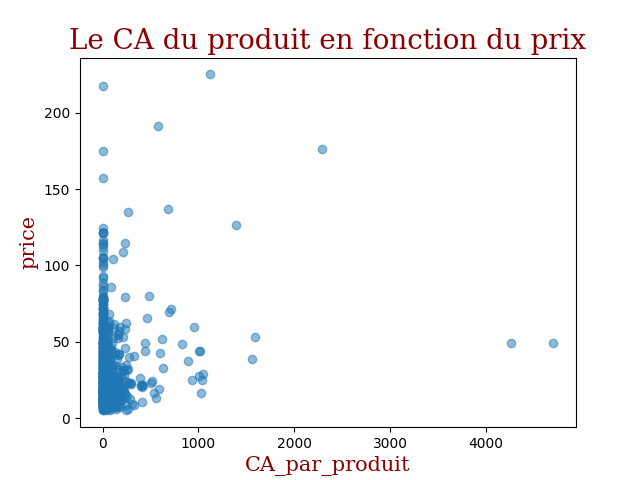

In [68]:
%matplotlib widget

# Matplotlib Scatter Plot
x= erp_web_new['CA_par_produit']
y= erp_web_new['price']
font1 = {'family':'serif','color':'darkred','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Le CA du produit en fonction du prix", fontdict = font1)
plt.xlabel('CA_par_produit', fontdict = font2)
plt.ylabel('price', fontdict = font2)



plt.scatter(x,y,  alpha=0.5, cmap='nipy_spectral')

plt.show()